# Kalorimetrie Laborversuch

Author: Diogo Fernandes Costa

Datum: 10.12.2023

Gruppe: 37

## Forschungsfrage

Formulieren Sie eine oder mehrere Forschungsfragen zu diesem Versuch.

In welchem Maße können die spezifischen Wärmekapazitäten verschiedener Proben durch den genutzten Kalorimeter experimentell und verlässlich ermittelt werden?

## Versuchsaufbau und Durchführung

Beschreiben Sie den Versuchsaufbau und die Versuchsdurchführung. Nutzen Sie hier Ihr eigenes Bild.

Zuerst wird Wasser in den Kochtopf eingefüllt und mittels eines Sous-Vide-Garers auf eine konstante Temperatur von 80°C erwärmt. Als nächstes wird das kleinere Gefäß mit 400ml Wasser gefüllt und ein Magnet hineingelegt. Mittels diesem Magnetrührer wird sichergestellt, dass sich die Temperatur im gesamten Wasser gleichmäßig verteilt. Zu den beiden Behältern werden vier Sensoren eingelegt und ein Sensor ist an dem Rahmen der Konstruktion montiert, um die Umgebungstemperatur zu messen. Es werden drei Sensoren in das kleinere Gefäß und ein Sensor in den Kochtopf getan.

Um nun den Versuch durchzuführen werden drei unterschiedliche zylinderartige Proben aus anderen Materialien in das 80°C-warme Wasser des Kochtopfes gelegt. Nachdem sich die Proben erwärmt haben, werden sie für den jeweiligen Versuch herausgenommen. Es muss hierbei beachtet werden, dass so wenig warmes Wasser in das Gefäß mit kaltem Wasser übernommen werden darf, um die Versuchsergebnisse nicht zu verfälschen. Wurde die Probe in das Gefäß mit kaltem Wasser getan, wird die Wassertemperatur gemessen, um mögliche Temperaturänderungen festzustellen.

<img src="figures/kalorimetrie_pruefstand.jpg" width="800">


## Versuchsauswertung

In [2]:
import numpy as np
from matplotlib import pyplot as plt
import h5py as h5
import importlib

from functions import m_json
from functions import utility

# Use FST-Style, if you don't like it, you can safely delete this line.
plt.style.use("FST.mplstyle")


### Kalorimeterkonstante
Hinweis: Sie können die Funktion *get_json_entry* nutzen um auf Metadaten zuzugreifen. 

Für die Messdatenauswertung steht Ihnen bereits ein Modul utility.py zur Verfügung. Ergänzen sie die Funktionen im Modul zwischen TODO und DONE. Sie finden weitere Hinweise im jeweiligen Bereich TODO->DONE. 


#### (i) Messdaten einlesen
Lesen Sie die Messdaten in ihr Notebook ein.

In [3]:
# TODO: Define the path to hdf5 file, which containing experiment data for constant.

datafile_path_const = "data/Heat_Capacity/data.h5"

# DONE #

In [4]:
importlib.reload(utility)

# TODO: Read all experimental data and associated metadata from HDF5 files for data processing.

data_dict = utility.get_plot_data_from_dataset(datafile_path_const, "RawData")

# DONE #

In [5]:
# TODO: In order to be able to process data from sensors with the same position,
# it is first necessary to obtain the index of the sensors with different positions in the numpy.ndarray.
# List the index of all calorimeter sensors (index_calorimeter) and
# the environment sensor (index_environment).
# You can use this variables to easily get access to the correct measurement data later.

index_calorimeter = [i for  i,name in enumerate(data_dict["name"]) if 'temperature_calorimeter' in name]
index_environment = [i for  i,name in enumerate(data_dict["name"]) if 'temperature_environment' in name]

# DONE #

#### (ii) Mittelwert und Standardabweichung für Plots bestimmen

Die Mittelwerte und Standardabweichungen der Messungen werden in der nächsten Sektion geplottet.

Nachdem die Mittelwerte und Standardabweichungen berechnet wurden, können Daten jeder Wärmequelle jeweils in einem numpy.ndarray gespeichert werden.

In [6]:
importlib.reload(utility)

# TODO: Calculate the average value and standard deviation of the calorimeter sensors and the environment sensor.
# You can use the indices from above.

mean_std_calorimeter = utility.cal_mean_and_standard_deviation(data_dict["temperature"][index_calorimeter])
mean_std_environment = utility.cal_mean_and_standard_deviation(data_dict["temperature"][index_environment])

# DONE #

#### (iii) Daten ploten

Im Kalorimeter befinden sich mehrere Sensoren, deren Mittelwerte sowie Standardabweichungen der Messung an jeden Zeitpunkt bestimmt wurden. Die Messdaten bzw. ihre Mittelwerte sollen in einem Plot eingetragen werden. Die Standardabweichungen der Sensoren sind als Errorbar im Plot zu sehen.

findfont: Font family ['Verdana'] not found. Falling back to DejaVu Sans.


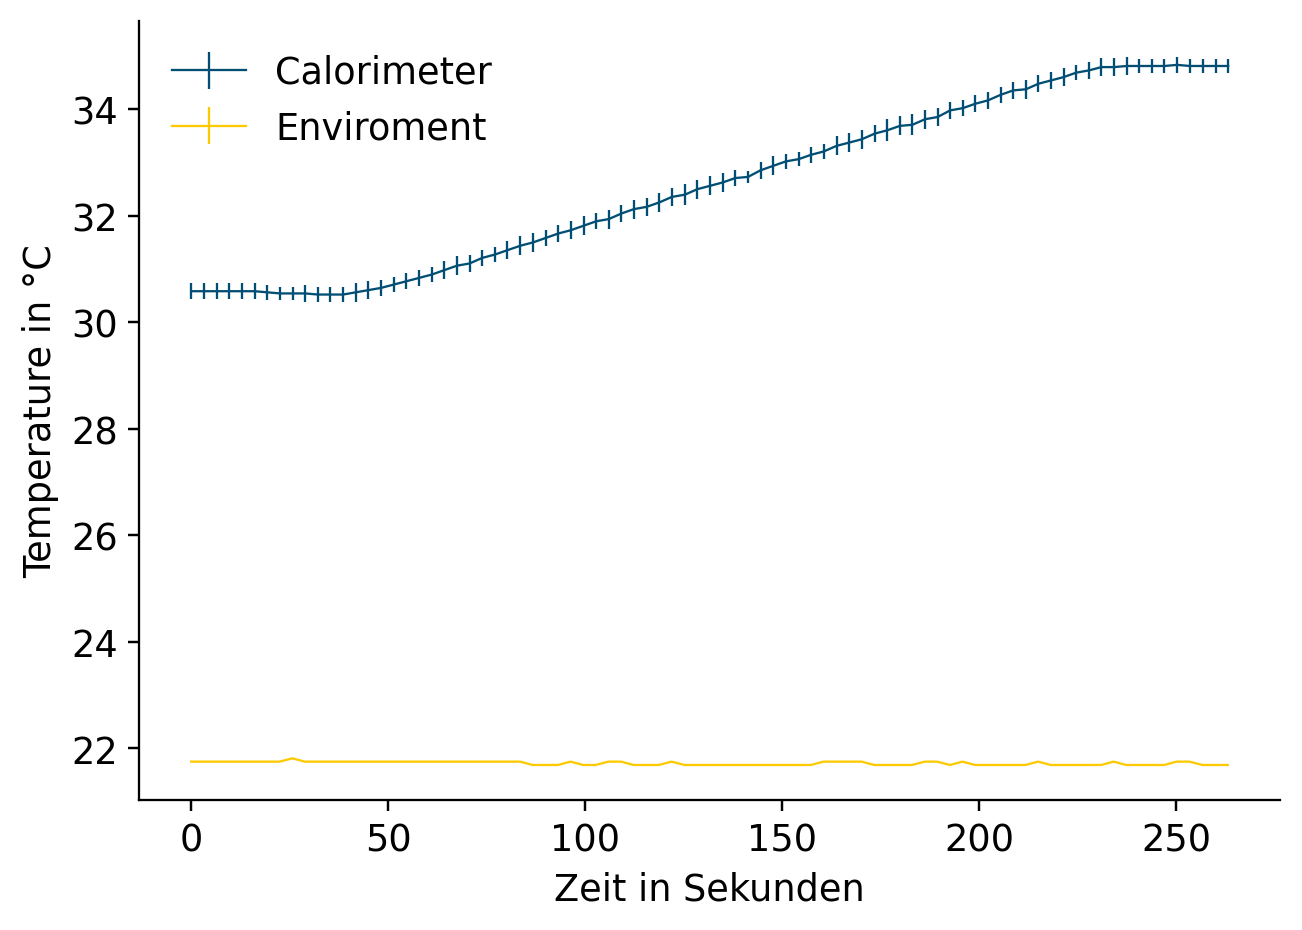

In [7]:
importlib.reload(utility)

# TODO: Use the temperature and time data for plotting
time = np.mean(data_dict["timestamp"][index_calorimeter],axis=0)
time_env = np.mean(data_dict["timestamp"][index_environment],axis=0)
utility.plot_temp_over_time([mean_std_calorimeter, mean_std_environment], [time - time[0], time_env-time_env[0]], ["Calorimeter", "Enviroment"], "Zeit in Sekunden","Temperature in °C")


# DONE #

#### (iv) Metadaten auslesen

Die notwendigen Daten bzw. Metadaten für die Berechnung der Wärmekapazität wird ausgelesen.

In [8]:
# Heat capacity of Water has been given
water_heat_capa = 4.18

# TODO: Read mass of the water from the metadata of the experiment.

water_mass = m_json.get_json_entry("datasheets", "1ee5ec0c-0b57-68cd-9d39-c9b7e9b18753", ["calorimeter", "medium", "mass", "value"])

# DONE #

In [9]:
# TODO: Reading heater related data from hdf5 file, please use the same datafile_path_const variable for the HDF5 path.
# Hint: Note whether the data is stored as an array or a scalar in the hdf5 dataset.

with h5.File(datafile_path_const, "r") as f:
    current = f["RawData/1ee21744-0355-6023-94b4-d5c041dd32cd/current"][()]
    heat_time = f["RawData/1ee21744-0355-6023-94b4-d5c041dd32cd/heat_time"][()]
    voltage = f["RawData/1ee21744-0355-6023-94b4-d5c041dd32cd/voltage"][()]

# DONE #

#### (v) Anfangs- und Endwert der Temperatur
Die Anfangs- und Endwert der Temperatur im Kloriemeter sind notwendig, um die Wärmekapazität zu bestimmen. 

Eine Möglichkeit wäre, durch das Maxium bzw. Minium und einen Schwellenwert ist ein Teil der Daten zu entnehmen. 

Daraus sind Mittelwerte zu berechnen. Die entsprechenden Mittelwerte können als Anfangs- und Endtemperatur verwendet werden.

In [10]:
importlib.reload(utility)

# TODO: Calculation of temperature data necessary to determine the specific heat capacity

temperature_end, temperature_start = utility.get_start_end_temperature(data_dict["temperature"][index_calorimeter]) 

# DONE #

#### (vi) Kalorimeterkonstante bestimmen
$$
C = \frac{UI\Delta t}{(T_2 - T_1)}
$$

In [11]:
# TODO: Calculate heat capacity of the calorimeter

calorimeter_const = (voltage * current * heat_time) / (temperature_end - temperature_start)

# DONE #

#### (Vii) Ergebnis

In [12]:
calorimeter_const

1914.8108108108108

### spezifische Wärmekapazität: erste Probe


#### (i) Messdaten einlesen

In [13]:
# TODO: Define the path to hdf5 file, which containing experiment data for constant.

datafile_path_prob1 = "data/PDC003/PDC003.h5"

# DONE #

In [14]:
importlib.reload(utility)

# TODO: Read all experimental data and associated metadata from HDF5 files for data processing.

data_dict = utility.get_plot_data_from_dataset(datafile_path_prob1, "RawData")

# DONE #

In [15]:


# TODO: In order to be able to process data from sensors with the same position,
# it is first necessary to obtain the index of the sensors with different positions in the numpy.ndarray.

index_calorimeter = [i for  i,name in enumerate(data_dict["name"]) if 'temperature_calorimeter' in name]
index_bath = [i for  i,name in enumerate(data_dict["name"]) if 'temperature_hot_water_bath' in name]
index_env = [i for  i,name in enumerate(data_dict["name"]) if 'temperature_environment' in name]

# DONE #

#### (ii) Mittelwert und Standardabweichung für Plots bestimmen

In [16]:
importlib.reload(utility)

# TODO: Calculate the average value and standard deviation of sensors.

mean_std_calorimeter = utility.cal_mean_and_standard_deviation(data_dict["temperature"][index_calorimeter])
mean_std_environment = utility.cal_mean_and_standard_deviation(data_dict["temperature"][index_env])
mean_std_heater = utility.cal_mean_and_standard_deviation(data_dict["temperature"][index_bath])

# DONE #

#### (iii) Daten ploten

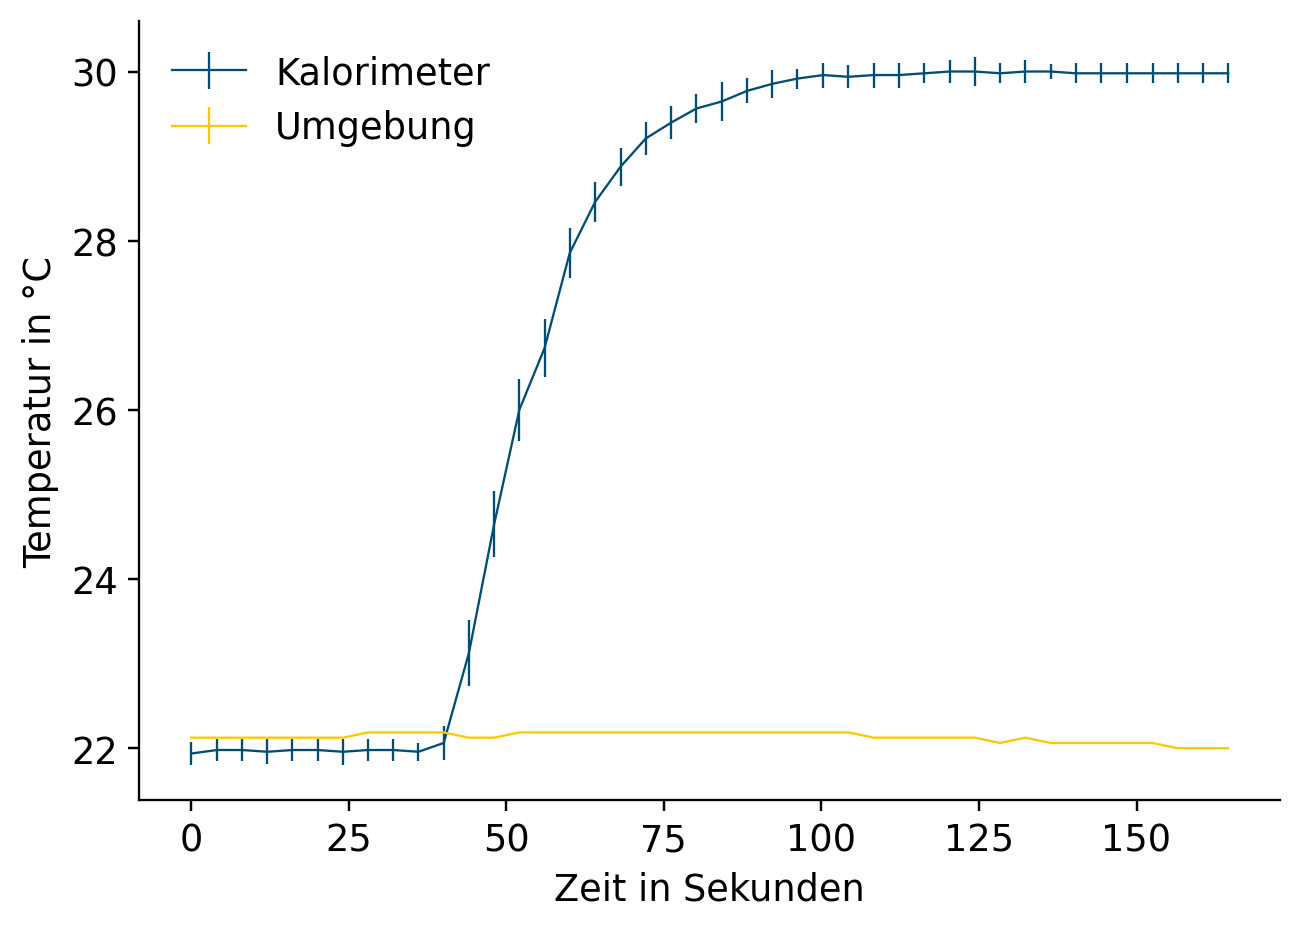

In [17]:
importlib.reload(utility)

# TODO: Use the temperature and time data for plotting.

time = np.mean(data_dict["timestamp"][index_calorimeter], axis=0)
time_env = np.mean(data_dict["timestamp"][index_env], axis=0)
utility.plot_temp_over_time([mean_std_calorimeter, mean_std_environment], [time - time[0], time_env-time_env[0]],["Kalorimeter", "Umgebung"],"Zeit in Sekunden","Temperatur in °C")

# DONE #

#### (iv) Metadaten auslesen

In [18]:
# TODO: Read mass of the sample from the metadata of the experiment.

sample_mass = m_json.get_json_entry("datasheets", "1ee57b2e-d878-640b-b947-b68f86e0e1c9", ["probe", "mass", "value"])

# DONE #

#### (v) Anfangs- und Endwert der Temperatur
Die Mischungstemperatur und Anfangstemperatur des Kalorimeters sind für die Berechnung relevant.

In [19]:
importlib.reload(utility)

# TODO: Calculation of temperature data necessary to determine the specific heat capacity

temperature_mix, temperature_start_water = utility.get_start_end_temperature(data_dict["temperature"][index_calorimeter]) 

# DONE #

In [20]:
# TODO: Determine the initial temperature of the sample. 
# Since the temperature of the water bath is stable, the initial temperature
# of the sample can be taken as the average of the 10 temperature-values after the start of the measurement.

temperature_start_sample = np.mean(data_dict["temperature"][index_bath][:10])


# DONE #

#### (vi) spezifische Wärmekapazität bestimmen
$$
c_p = \frac{C(T_M-T_1)}{m_p(T_2-T_M)}
$$

In [21]:
# TODO: Calulate specific heat capacity of the sample.

sample_heat_capa = (calorimeter_const * (temperature_mix - temperature_start_water)) / (sample_mass * (temperature_start_sample - temperature_mix))

# DONE #

#### (Vii) Ergebnis

In [22]:
sample_heat_capa

0.5237928132506164

### spezifische Wärmekapazität: zweite Probe


#### (i) Messdaten einlesen

In [23]:
# TODO: Define the path to hdf5 file, which containing experiment data for constant.

datafile_path_prob2 = "data/PDC012/PDC012.h5"

# DONE #

In [24]:
importlib.reload(utility)

# TODO: Read all experimental data and associated metadata from HDF5 files for data processing.

data_dict = utility.get_plot_data_from_dataset(datafile_path_prob2, "RawData")

# DONE #

In [25]:
# TODO: In order to be able to process data from sensors with the same position,
# it is first necessary to obtain the index of the sensors with different positions in the numpy.ndarray.

index_calorimeter = [i for  i,name in enumerate(data_dict["name"]) if 'temperature_calorimeter' in name]
index_bath = [i for  i,name in enumerate(data_dict["name"]) if 'temperature_hot_water_bath' in name]
index_env = [i for  i,name in enumerate(data_dict["name"]) if 'temperature_environment' in name]


# DONE #

#### (ii) Mittelwert und Standardabweichung für Plots bestimmen

In [26]:
importlib.reload(utility)

# TODO: Calculate the average value and standard deviation of sensors.

mean_std_calorimeter = utility.cal_mean_and_standard_deviation(data_dict["temperature"][index_calorimeter])
mean_std_environment = utility.cal_mean_and_standard_deviation(data_dict["temperature"][index_env])
mean_std_heater = utility.cal_mean_and_standard_deviation(data_dict["temperature"][index_bath])
# DONE #

#### (iii) Daten ploten

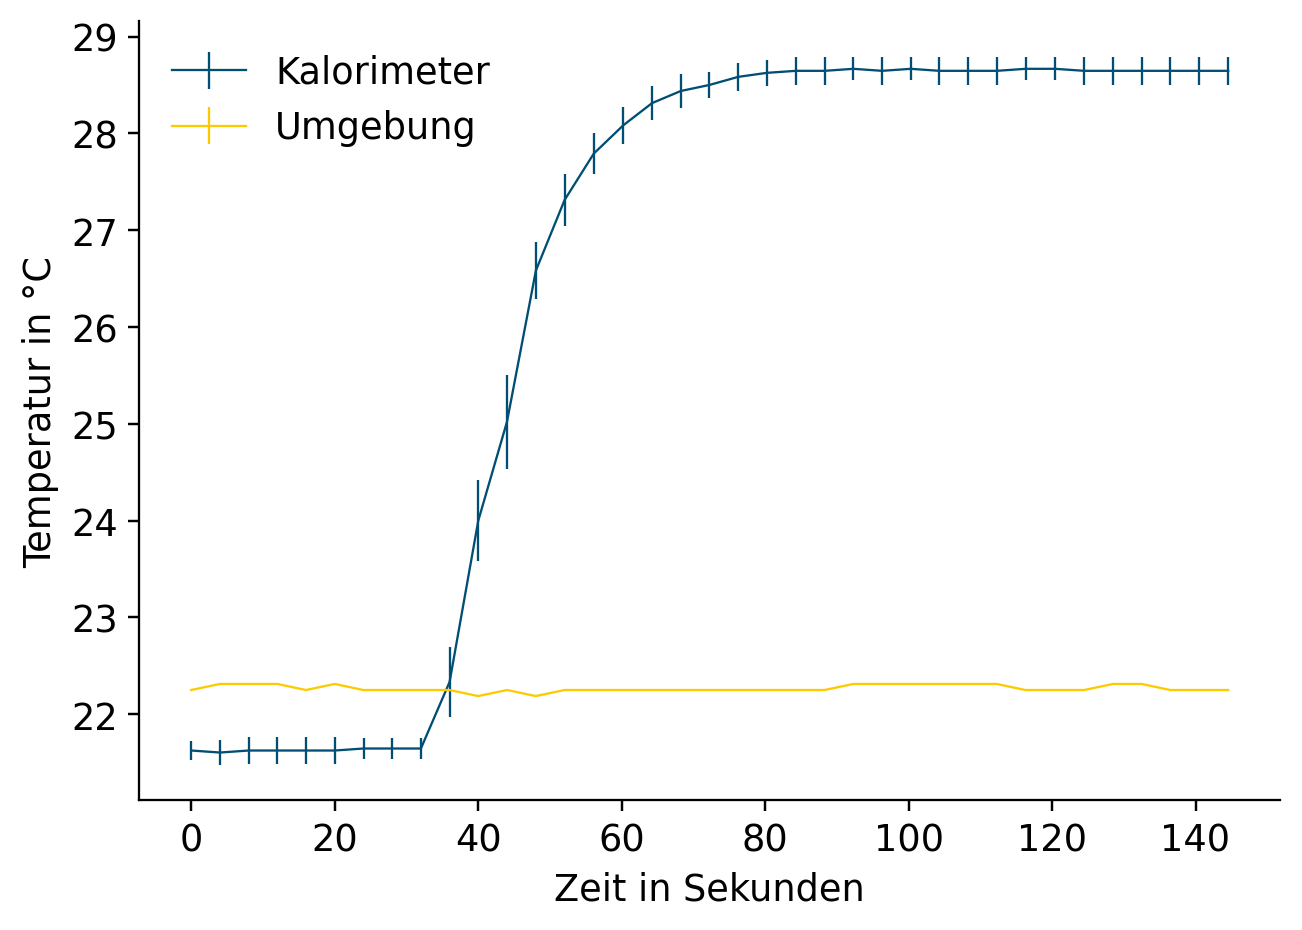

In [27]:
importlib.reload(utility)

# TODO: Use the temperature and time data for plotting.
time = np.mean(data_dict["timestamp"][index_calorimeter], axis=0)
time_env = np.mean(data_dict["timestamp"][index_env], axis=0)
utility.plot_temp_over_time([mean_std_calorimeter, mean_std_environment], [time - time[0], time_env-time_env[0]],["Kalorimeter", "Umgebung"],"Zeit in Sekunden","Temperatur in °C")

# DONE #

#### (iv) Metadaten auslesen

In [28]:
# TODO: Read mass of the sample from the metadata of the experiment.

sample_mass = m_json.get_json_entry("datasheets", "1ee57b38-1b08-63da-8b38-63a271236a0b", ["probe", "mass", "value"])

# DONE #

#### (v) Anfangs- und Endwert der Temperatur

In [29]:
importlib.reload(utility)

# TODO: Calculation of temperature data necessary to determine the specific heat capacity

temperature_mix, temperature_start_water = utility.get_start_end_temperature(data_dict["temperature"][index_calorimeter]) 

# DONE #

In [30]:
# TODO: Determine the initial temperature of the sample. 
# Since the temperature of the water bath is stable, the initial temperature
# of the sample can be taken as the average of the 10 data after the start of the measurement.

temperature_start_sample = np.mean(data_dict["temperature"][index_bath][:10])

# DONE #

#### (vi) spezifische Wärmekapazität bestimmen

In [31]:
# TODO: Calulate specific heat capacity of the sample.

sample_heat_capa = (calorimeter_const * (temperature_mix - temperature_start_water)) / (sample_mass * (temperature_start_sample - temperature_mix))

# DONE #

#### (Vii) Ergebnis

In [32]:
sample_heat_capa

0.4074091986264932

### spezifische Wärmekapazität: dritte Probe


#### (i) Messdaten einlesen

In [33]:
# TODO: Define the path to hdf5 file, which containing experiment data for constant.

datafile_path_prob3 = "data/PDC028/PDC028.h5"

# DONE #

In [34]:
importlib.reload(utility)

# TODO: Read all experimental data and associated metadata from HDF5 files for data processing.

data_dict = utility.get_plot_data_from_dataset(datafile_path_prob3, "RawData")

# DONE #

In [35]:
# TODO: In order to be able to process data from sensors with the same position,
# it is first necessary to obtain the index of the sensors with different positions in the numpy.ndarray.

index_calorimeter = [i for  i,name in enumerate(data_dict["name"]) if 'temperature_calorimeter' in name]
index_bath = [i for  i,name in enumerate(data_dict["name"]) if 'temperature_hot_water_bath' in name]
index_env = [i for  i,name in enumerate(data_dict["name"]) if 'temperature_environment' in name]


# DONE #

#### (ii) Mittelwert und Standardabweichung für Plots bestimmen

In [36]:
importlib.reload(utility)

# TODO: Calculate the average value and standard deviation of sensors.

mean_std_calorimeter = utility.cal_mean_and_standard_deviation(data_dict["temperature"][index_calorimeter])
mean_std_environment = utility.cal_mean_and_standard_deviation(data_dict["temperature"][index_env])
mean_std_heater = utility.cal_mean_and_standard_deviation(data_dict["temperature"][index_bath])

# DONE #

#### (iii) Daten ploten

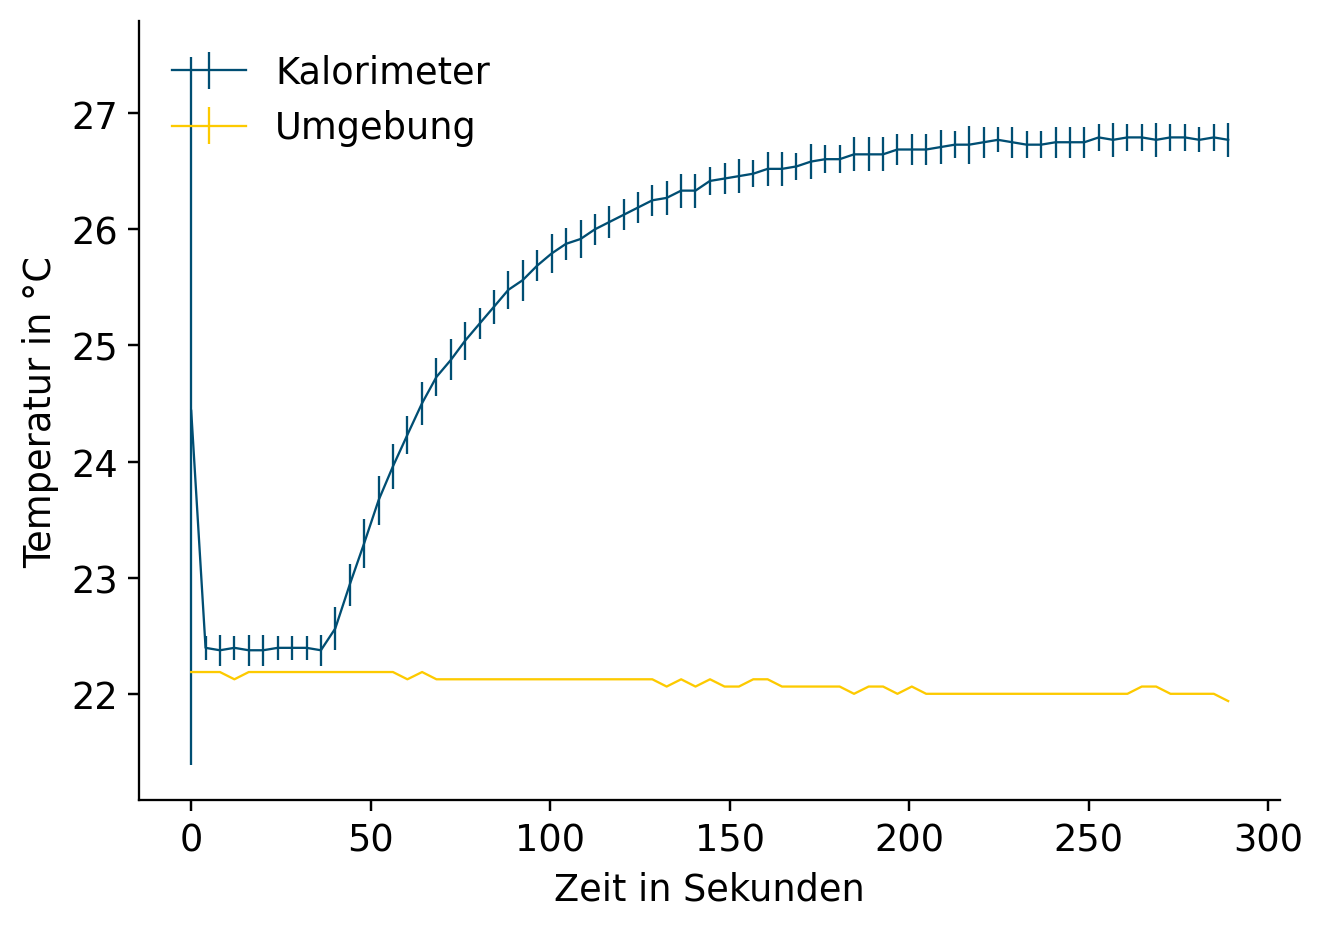

In [37]:
importlib.reload(utility)

# TODO: Use the temperature and time data for plotting.

time = np.mean(data_dict["timestamp"][index_calorimeter], axis=0)
time_env = np.mean(data_dict["timestamp"][index_env], axis=0)
utility.plot_temp_over_time([mean_std_calorimeter, mean_std_environment], [time - time[0], time_env-time_env[0]],["Kalorimeter", "Umgebung"],"Zeit in Sekunden","Temperatur in °C")

# DONE #

#### (iv) Metadaten auslesen

In [38]:
# TODO: Read mass of the sample from the metadata of the experiment.

sample_mass = m_json.get_json_entry("datasheets", "1ee7d44b-07b6-6af8-adbe-d5e4818c9942", ["probe", "mass", "value"])

# DONE #

#### (v) Anfangs- und Endwert der Temperatur

In [39]:
importlib.reload(utility)

# TODO: Calculation of temperature data necessary to determine the specific heat capacity

temperature_mix, temperature_start_water = utility.get_start_end_temperature(data_dict["temperature"][index_calorimeter]) 

# DONE #

In [40]:
# TODO: Determine the initial temperature of the sample. 
# Since the temperature of the water bath is stable, the initial temperature
# of the sample can be taken as the average of the 10 data after the start of the measurement.

temperature_start_sample = np.mean(data_dict["temperature"][index_bath][:10])

# DONE #

#### (vi) spezifische Wärmekapazität bestimmen

In [41]:
# TODO: Calulate specific heat capacity of the sample.

sample_heat_capa = (calorimeter_const * (temperature_mix - temperature_start_water)) / (sample_mass * (temperature_start_sample - temperature_mix))

# DONE #

#### (Vii) Ergebnis

In [42]:
sample_heat_capa

2.682442099203377

## Diskussion
Analysieren Sie Ihre Ergebnisse aus wissenschaflticher Sicht. Berücksichtigen Sie dabei Ihre oben genannte Forschungsfrage. Wie wirkt sich die mit der Probe aus dem Heißwasserbad transportierte Wassermenge auf das Ergebnis aus? Welche weiteren Fehlerquellen gibt es?

In Zusammenfassung ergeben sich die folgenden Resultate:

$$
c_{Edelstahl} = 0.5237928 \frac{kJ}{kg \cdot K} 
$$

$$
c_{Messing} = 0.407409 \frac{kJ}{kg \cdot K} 
$$

$$
c_{PA66} = 2.682442 \frac{kJ}{kg \cdot K} 
$$

Aus unterschiedlichen Recherchen ergeben folgende Werte für die Wärmekapazitäten der Proben:

$$
c_{Edelstahl} = 0.49 \frac{kJ}{kg \cdot K} 
$$

$$
c_{Messing} = 0.377 \frac{kJ}{kg \cdot K} 
$$

$$
c_{PA66} = 1.7 \frac{kJ}{kg \cdot K} 
$$

Aus dem Vergleich der experimentell ermittelten Werte und den aus der Recherche ist zu erkennen, dass die Werte nur eine geringe Abweichung aufzeigen. Es ist somit den Resultaten zu entnehmen, dass die vier Versuche ordentlich durchgeführt und dokumentiert wurden. Nichtsdestotrotz weist der letzte Versuch mit der Probe des Werkstoffes PA66 eine große Abweichung auf. Ein möglicher Grund kann das fehlerhafte Durchführen des Versuches sein, da die Probe bei der Entnahme aus dem großen Wasserbad mehr überschüssiges Wasser in die Messkammer mitgenommen hat als die anderen beiden Proben. Bei den anderen beiden metallischen Proben ist dies weniger geschehen. Es ist auch zu erwähnen, dass mögliche Abweichungen der Messsensorik als auch Abweichungen beim Messen des Wasserstandes oder der verunreinigten Probenoberfläche entstehen können, sodass sich alle aufsummieren und die Resultate beeinflussen.

## Fazit
Ziehe Sie ein persönliches Fazit zum Versuch:

Ich habe gelernt, dass eine genaue und sehr ordentliche Arbeitsweise bei der Durchführung und Dokumentation von Versuchen sehr wichtig ist. Mangelnde Sorgfalt kann in den schwierigsten Fällen alle weiteren Schritte der Versuchsanalyse beeinflussen und somit die Resultate für den Vergleich mit anderen Quellen verfälschen. Für eine wissenschaftliche Arbeit ist es somit unter allen Umständen notwendig den Versuchsablauf sehr genau durchzuführen und diesen und das Resultat zu dokumentieren, um sie für die spätere Analyse zu nutzen und sie mit Daten aus Tabellen zu vergleichen.